In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
metar_data = pd.read_csv('../00_data_preparation/metar/metar_dataset_with_airport_location.csv')
parameter_data = pd.read_csv('../01_data_analyzation/csv_files/parameter_data_2021_2022_2023_final.csv')

In [3]:
# Rename metar data column for airport 
metar_data.rename(columns={'airport_identifier':'airport'}, inplace=True)

# Merge in metar data for matching parameter data timestamps
parameter_metar_data = pd.merge(metar_data[['airport', 'time', 'contain_FZ', 'metar', 'metartype']], parameter_data, on=['airport', 'time'])

# Add airport ID for embedding
parameter_metar_data['airport_id'] = pd.factorize(parameter_metar_data['airport'])[0]

# Drop specific columns
parameter_metar_data = parameter_metar_data.drop(['longitude', 'latitude', 'x', 'y'], axis=1)

In [6]:
# Convert temperature from Kelvin to Celsius

In [4]:
temperature_columns = ['air_temperature_0m', 'air_temperature_2m', 'air_temperature_pl_700', 'air_temperature_pl_850', 'air_temperature_pl_925']
parameter_metar_data[temperature_columns] = round(parameter_metar_data[temperature_columns] - 273.15, 2)

In [5]:
parameter_metar_data

,airport,time,contain_FZ,metar,metartype,air_temperature_0m,air_temperature_2m,relative_humidity_2m,precipitation_amount_acc,x_wind_10m,...,x_wind_pl_700,y_wind_pl_700,air_temperature_pl_850,x_wind_pl_850,y_wind_pl_850,air_temperature_pl_925,x_wind_pl_925,y_wind_pl_925,liquid_water_content_of_surface_snow,airport_id
0,ENAL,2021-01-01 00:00:00,False,ENAL 010020Z 08005KT 9999 SCT024/// BKN037/// ...,AUTO,6.05,2.33,0.793553,0.000000,-2.830682,...,-7.998411,-14.842338,-4.88,-6.358129,-12.467776,-2.23,-3.504538,-5.193470,0.0,0
1,ENAL,2021-01-01 01:00:00,False,ENAL 010120Z 08005KT 9999 FEW027/// SCT040/// ...,AUTO,5.98,2.12,0.809798,0.000000,-1.839786,...,-6.820138,-14.301944,-4.94,-5.253078,-12.508469,-2.40,-3.765361,-5.286296,0.0,0
2,ENAL,2021-01-01 02:00:00,False,ENAL 010150Z 09006KT 9999 BKN025/// M01/M02 Q1...,AUTO,5.84,1.90,0.826657,0.000000,-1.193810,...,-6.324274,-12.526227,-4.84,-5.653297,-10.742863,-2.37,-3.940522,-5.127879,0.0,0
3,ENAL,2021-01-01 03:00:00,False,ENAL 010320Z 09006KT 9999 OVC025/// 01/M02 Q1006=,AUTO,5.79,1.63,0.865065,0.000000,-0.274018,...,-4.400638,-12.477611,-4.84,-3.638925,-10.466150,-2.20,-2.774034,-5.080758,0.0,0
4,ENAL,2021-01-01 04:00:00,False,ENAL 010420Z 17003KT 9999 OVC028/// 01/M01 Q1006=,AUTO,5.81,1.67,0.869259,0.000000,-0.496821,...,-3.903990,-13.757484,-4.91,-2.547523,-8.593373,-1.81,-2.040594,-5.268571,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161162,ENZV,2023-12-31 19:00:00,False,ENZV 311850Z 09018G29KT CAVOK 05/M04 Q0994=,MANUAL,1.45,2.29,0.667786,0.000810,-8.706322,...,-7.881533,22.779630,0.68,-12.718229,24.950168,-1.08,-20.952863,11.901805,0.0,68
1161163,ENZV,2023-12-31 20:00:00,False,ENZV 311950Z 10017KT CAVOK 05/M04 Q0994=,MANUAL,1.34,2.23,0.669755,0.005201,-10.148981,...,-9.363325,20.734794,-0.40,-8.308671,22.079471,-0.52,-23.621225,15.640875,0.0,68
1161164,ENZV,2023-12-31 21:00:00,False,ENZV 312050Z 10018KT CAVOK 05/M04 Q0994=,MANUAL,1.11,2.02,0.669258,0.015085,-11.361458,...,-2.256587,14.746435,0.24,-4.126466,20.094198,-0.08,-25.961374,18.607167,0.0,68
1161165,ENZV,2023-12-31 22:00:00,False,ENZV 312220Z 10023G34KT CAVOK 05/M05 Q0994=,MANUAL,0.85,1.80,0.660101,0.023475,-11.822343,...,-2.649214,12.681184,0.71,-3.405979,15.523595,0.05,-26.113771,18.558822,0.0,68


In [6]:
parameter_metar_data_true = parameter_metar_data[parameter_metar_data['contain_FZ']]

In [7]:
print(f'Max temperature registered with FZ = TRUE: {parameter_metar_data_true["air_temperature_2m"].max()}')
print(f'Min temperature registered with FZ = TRUE: {parameter_metar_data_true["air_temperature_2m"].min()}')

Max temperature registered with FZ = TRUE: 6.76
Min temperature registered with FZ = TRUE: -28.51


In [8]:
grouped_data = parameter_metar_data_true.groupby('airport')

max_temperatures_by_airport = grouped_data['air_temperature_2m'].max()
min_temperatures_by_airport = grouped_data['air_temperature_2m'].min()

In [9]:
for airport, max_temp, min_temp in zip(max_temperatures_by_airport.index, max_temperatures_by_airport, min_temperatures_by_airport):
    print(f"Airport: {airport}")
    print(f"Max temperature (°C): {max_temp}")
    print(f"Min temperature (°C): {min_temp}")
    print()

Airport: ENAL
Max temperature (°C): 2.31
Min temperature (°C): -3.01

Airport: ENAN
Max temperature (°C): 2.52
Min temperature (°C): -8.94

Airport: ENAT
Max temperature (°C): 3.06
Min temperature (°C): -15.24

Airport: ENBJ
Max temperature (°C): 0.6
Min temperature (°C): -10.11

Airport: ENBL
Max temperature (°C): 1.44
Min temperature (°C): -2.52

Airport: ENBN
Max temperature (°C): 1.54
Min temperature (°C): -3.97

Airport: ENBO
Max temperature (°C): 3.68
Min temperature (°C): -5.04

Airport: ENBR
Max temperature (°C): 2.27
Min temperature (°C): -1.17

Airport: ENBS
Max temperature (°C): 1.07
Min temperature (°C): -14.84

Airport: ENBV
Max temperature (°C): 2.93
Min temperature (°C): -11.19

Airport: ENCN
Max temperature (°C): 3.34
Min temperature (°C): -7.39

Airport: ENDR
Max temperature (°C): 3.12
Min temperature (°C): -2.33

Airport: ENDU
Max temperature (°C): 2.71
Min temperature (°C): -13.16

Airport: ENEV
Max temperature (°C): 1.21
Min temperature (°C): -6.96

Airport: ENFB
Ma

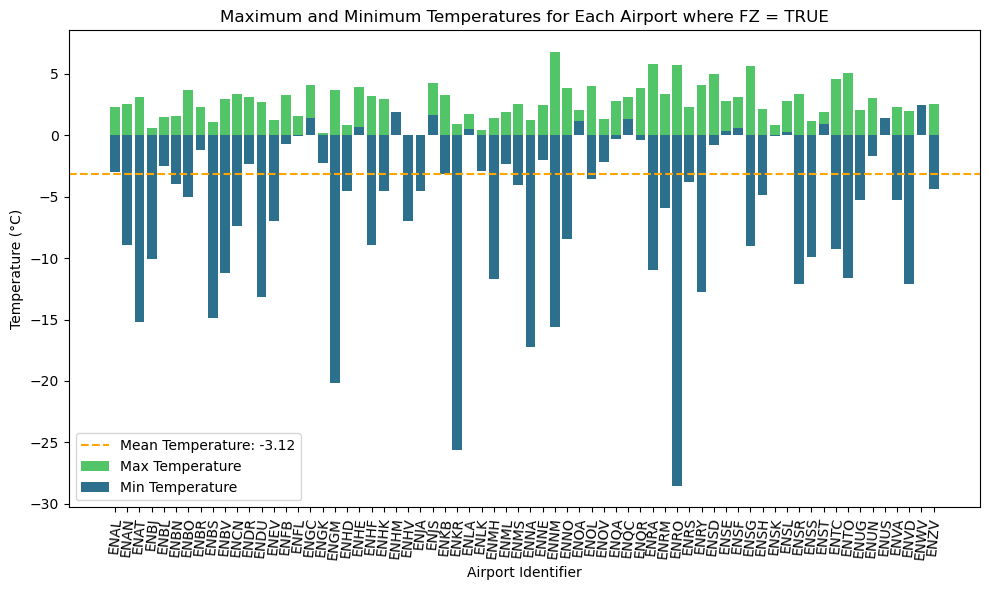

In [20]:
import matplotlib.pyplot as plt

mean_temperature = parameter_metar_data_true['air_temperature_2m'].mean()

color_palette = sns.color_palette('viridis', 10)

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(max_temperatures_by_airport.index, max_temperatures_by_airport, color=color_palette[7], label='Max Temperature')
ax.bar(min_temperatures_by_airport.index, min_temperatures_by_airport, color=color_palette[3], label='Min Temperature')

ax.axhline(y=mean_temperature, color='orange', linestyle='--', label=f'Mean Temperature: {round(mean_temperature, 2)}')


ax.set_xlabel('Airport Identifier')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Maximum and Minimum Temperatures for Each Airport where FZ = TRUE')
ax.legend()

plt.xticks(rotation=85)

plt.tight_layout()
plt.savefig('temp_overview_fz_true.png')
plt.show()

In [15]:
parameter_metar_data_true_manual = parameter_metar_data_true[parameter_metar_data_true['metartype']=='MANUAL']

In [16]:
print(f'Max temperature registered with FZ = TRUE: {parameter_metar_data_true_manual["air_temperature_2m"].max()}')
print(f'Min temperature registered with FZ = TRUE: {parameter_metar_data_true_manual["air_temperature_2m"].min()}')

Max temperature registered with FZ = TRUE: 5.68
Min temperature registered with FZ = TRUE: -28.51


In [15]:
grouped_data = parameter_metar_data_true_manual.groupby('airport')

# Calculate maximum and minimum temperatures for each airport
max_temperatures_by_airport = grouped_data['air_temperature_2m'].max()
min_temperatures_by_airport = grouped_data['air_temperature_2m'].min()

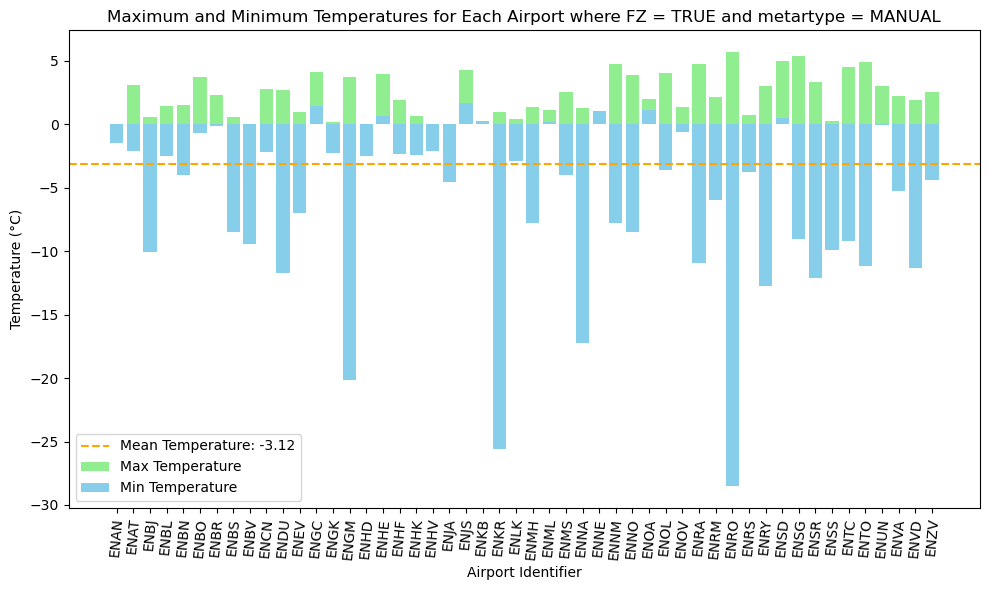

In [16]:
import matplotlib.pyplot as plt

mean_temperature = parameter_metar_data_true['air_temperature_2m'].mean()

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(max_temperatures_by_airport.index, max_temperatures_by_airport, color='lightgreen', label='Max Temperature')
ax.bar(min_temperatures_by_airport.index, min_temperatures_by_airport, color='skyblue', label='Min Temperature')

ax.axhline(y=mean_temperature, color='orange', linestyle='--', label=f'Mean Temperature: {round(mean_temperature, 2)}')


ax.set_xlabel('Airport Identifier')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Maximum and Minimum Temperatures for Each Airport where FZ = TRUE and metartype = MANUAL')
ax.legend()

plt.xticks(rotation=85)

plt.tight_layout()
plt.show()

In [17]:
filtered_temperature_parameter_data = parameter_metar_data[
    parameter_metar_data.apply(lambda row: all(row[col] <= 6 for col in temperature_columns), axis=1)
]


In [18]:
filtered_temperature_parameter_data['airport'].nunique()

54

In [74]:
#filtered_temperature_parameter_data.to_csv('filtered_temperature_parameter_data.csv', index=False)

/tmp/ipykernel_1210290/1213910166.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_true['air_temperature_2m'], label='FZ True', shade=True)
/tmp/ipykernel_1210290/1213910166.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_false['air_temperature_2m'], label='FZ False', shade=True)


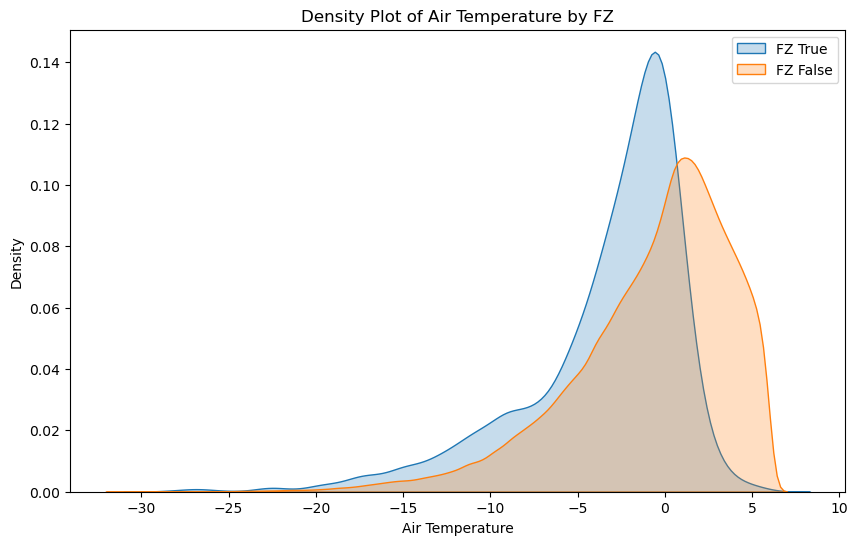

In [19]:

df_true = filtered_temperature_parameter_data[filtered_temperature_parameter_data['contain_FZ'] == True]
df_false = filtered_temperature_parameter_data[filtered_temperature_parameter_data['contain_FZ'] == False]

plt.figure(figsize=(10, 6))

sns.kdeplot(df_true['air_temperature_2m'], label='FZ True', shade=True)
sns.kdeplot(df_false['air_temperature_2m'], label='FZ False', shade=True)

plt.xlabel('Air Temperature')
plt.ylabel('Density')
plt.title('Density Plot of Air Temperature by FZ')

plt.legend()

plt.show()

/modules/rhel8/conda/install/envs/development-11-2023/lib/python3.9/site-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/modules/rhel8/conda/install/envs/development-11-2023/lib/python3.9/site-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


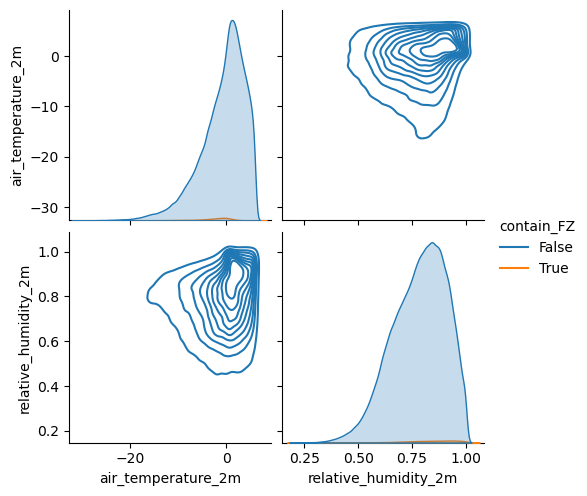

In [24]:
sns.pairplot(filtered_temperature_parameter_data, hue='contain_FZ', vars=['air_temperature_2m', 'relative_humidity_2m'], kind='kde')

/tmp/ipykernel_1210290/1666758177.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_true['air_temperature_2m'], label='FZ True', shade=True)
/tmp/ipykernel_1210290/1666758177.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_false['air_temperature_2m'], label='FZ False', shade=True)


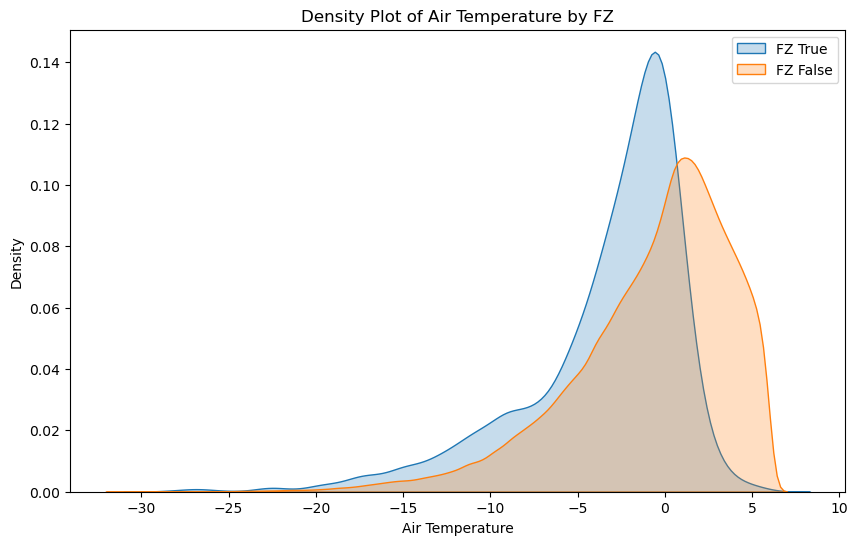

/tmp/ipykernel_1210290/1666758177.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_true['relative_humidity_2m'], label='FZ True', shade=True)
/tmp/ipykernel_1210290/1666758177.py:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_false['relative_humidity_2m'], label='FZ False', shade=True)


Text(0.5, 1.0, 'KDE plot of Relative Humidity')

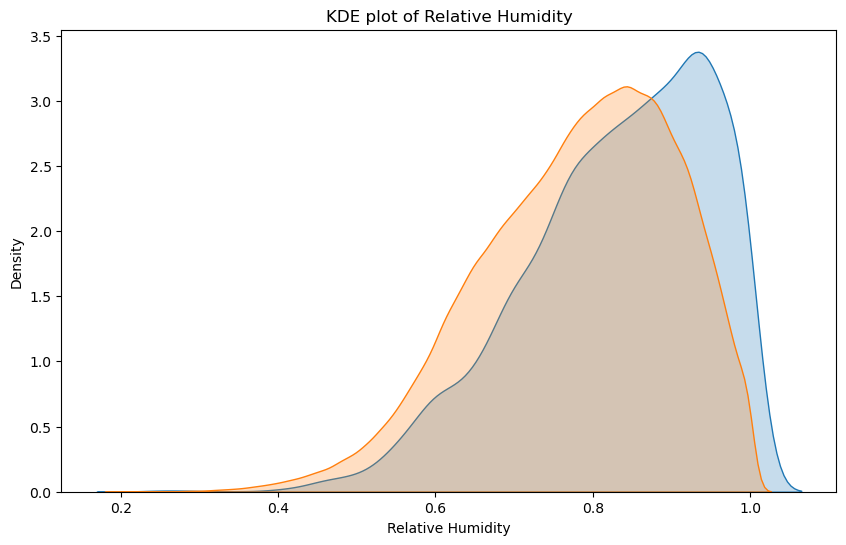

In [21]:

df_true = filtered_temperature_parameter_data[filtered_temperature_parameter_data['contain_FZ'] == True]
df_false = filtered_temperature_parameter_data[filtered_temperature_parameter_data['contain_FZ'] == False]

plt.figure(figsize=(10, 6))

sns.kdeplot(df_true['air_temperature_2m'], label='FZ True', shade=True)
sns.kdeplot(df_false['air_temperature_2m'], label='FZ False', shade=True)

plt.xlabel('Air Temperature')
plt.ylabel('Density')
plt.title('Density Plot of Air Temperature by FZ')

plt.legend()

plt.show()


plt.figure(figsize=(10, 6))

sns.kdeplot(df_true['relative_humidity_2m'], label='FZ True', shade=True)
sns.kdeplot(df_false['relative_humidity_2m'], label='FZ False', shade=True)

plt.xlabel('Relative Humidity')
plt.ylabel('Density')
plt.title('KDE plot of Relative Humidity')

plt.legend()

plt.show()


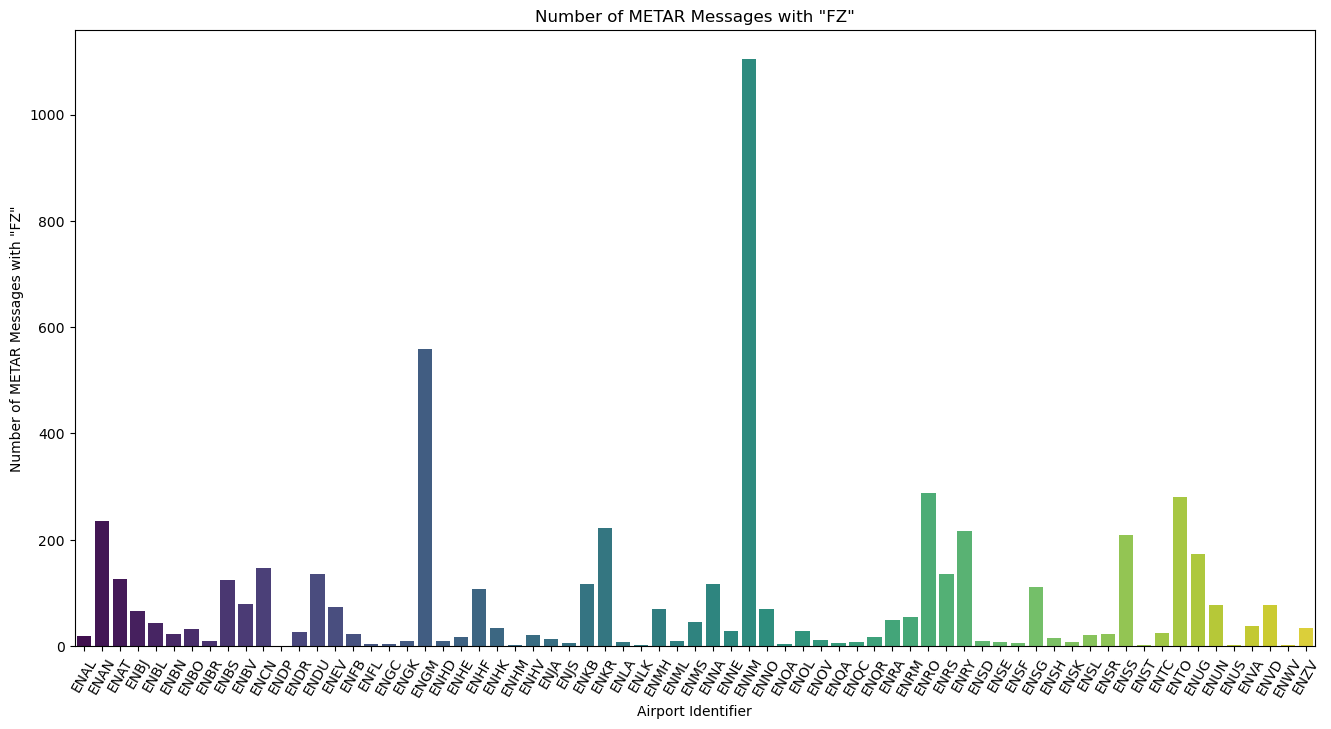

In [24]:
num_FZ = parameter_metar_data.groupby('airport')['contain_FZ'].sum().reset_index()

plt.figure(figsize=(16, 8))
sns.barplot(data=num_FZ, x='airport', y='contain_FZ', palette='viridis')
plt.xlabel('Airport Identifier')
plt.ylabel('Number of METAR Messages with "FZ"')
plt.title('Number of METAR Messages with "FZ"')
plt.xticks(rotation=60)
plt.show()